<a href="https://www.kaggle.com/reshmashinde123/pima-indians-diabetes-eda-and-prediction?scriptVersionId=86697604" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
309,2,124,68,28,205,32.9,0.875,30,1
376,0,98,82,15,84,25.2,0.299,22,0
484,0,145,0,0,0,44.2,0.630,31,1
431,3,89,74,16,85,30.4,0.551,38,0
44,7,159,64,0,0,27.4,0.294,40,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
print('Nan values in the dataset : ',data.isna().sum().sum())
print('Duplicate values in the dataset : ',data.duplicated().sum())

Nan values in the dataset :  0
Duplicate values in the dataset :  0


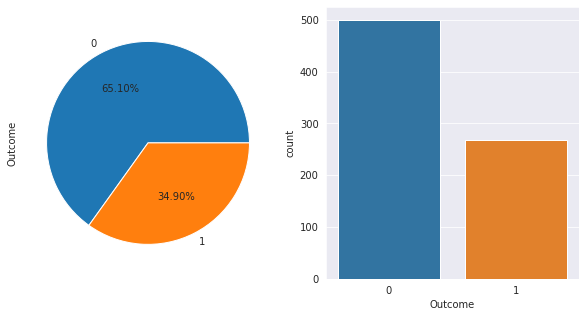

In [6]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
data['Outcome'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Outcome', data = data)
plt.show()

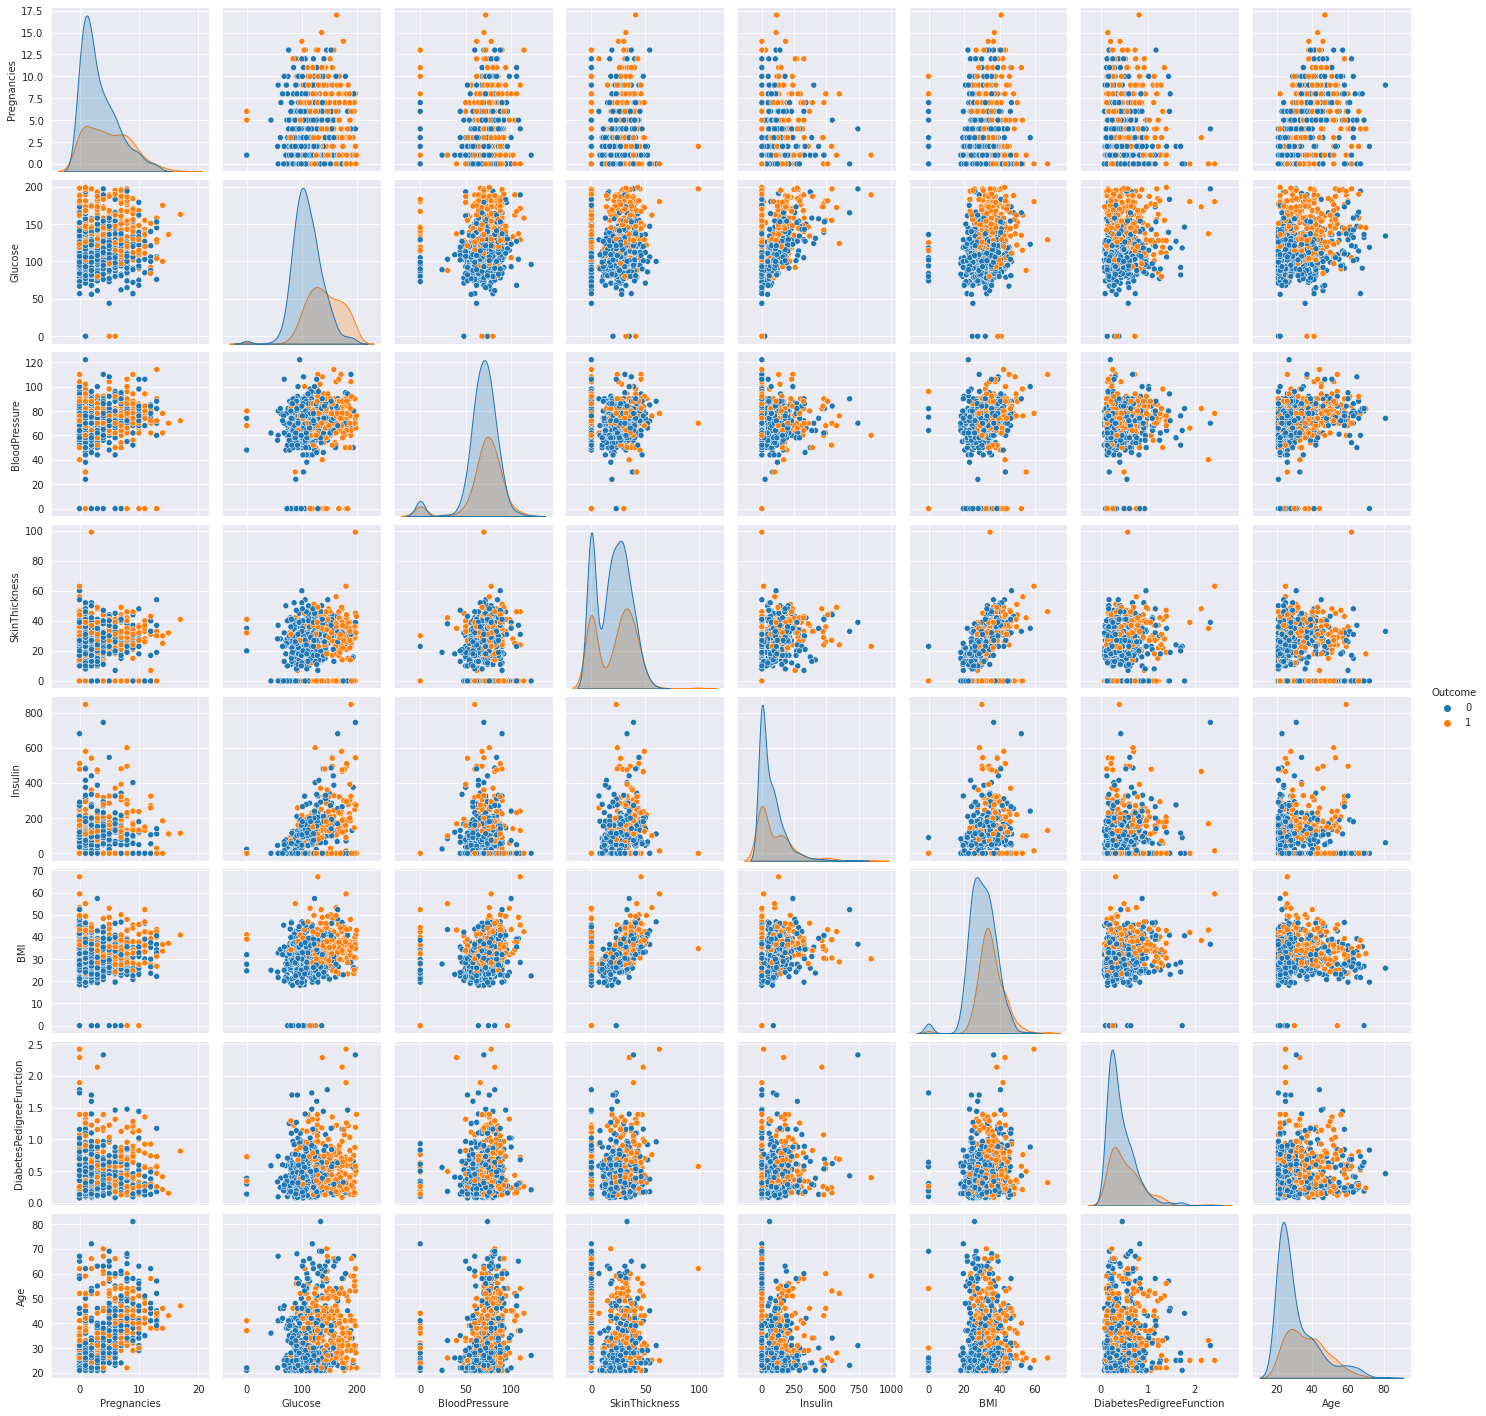

In [7]:
sns.pairplot(data, hue = 'Outcome', data = data)
plt.show()

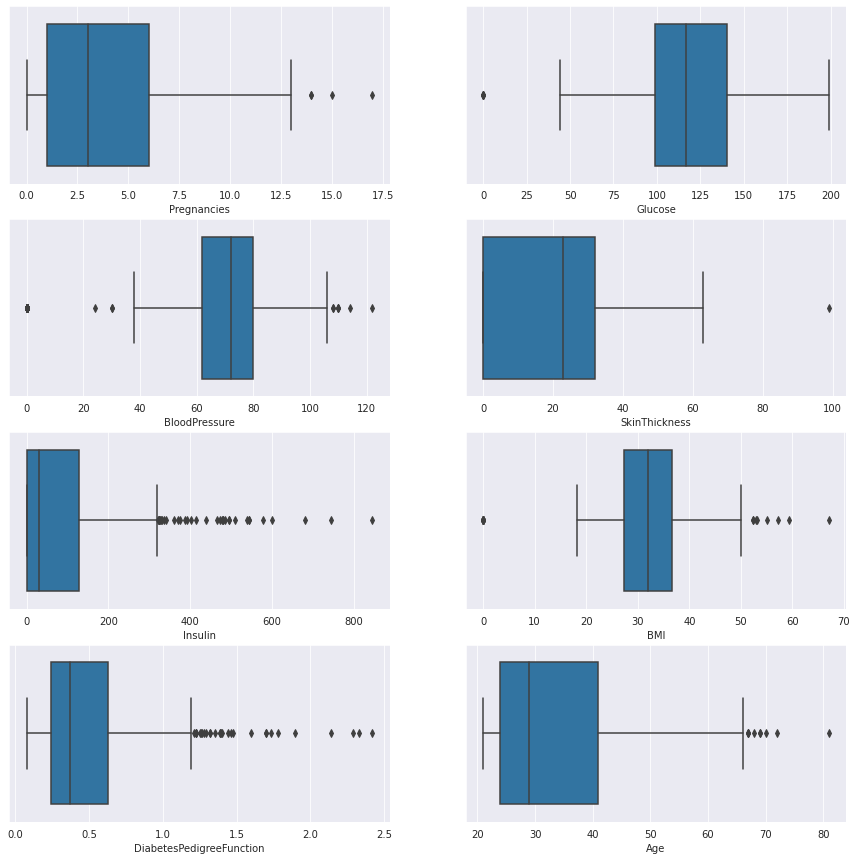

In [8]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data)
plt.show()

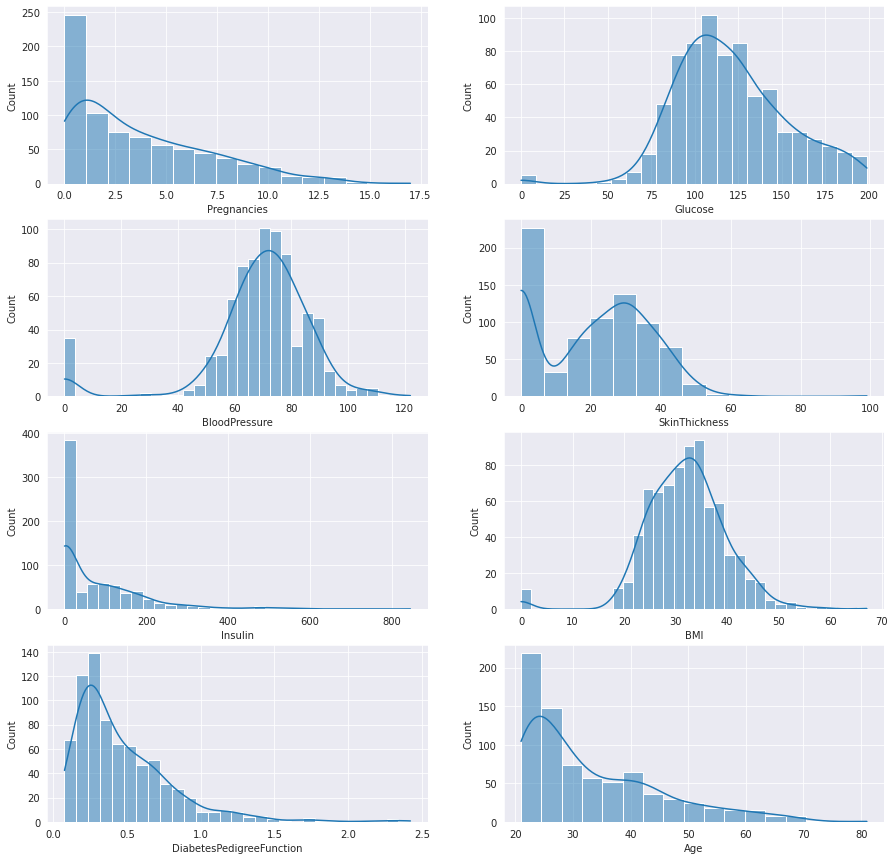

In [9]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.histplot(x = col, data = data, kde = True)
plt.show()

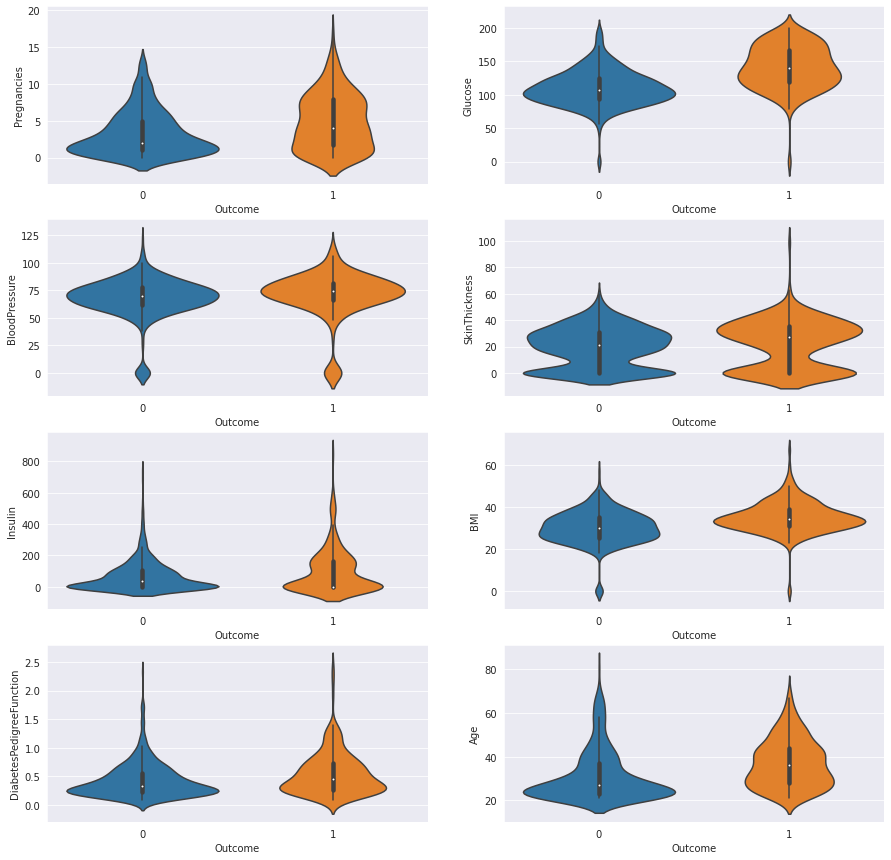

In [10]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(4,2,i+1)
    sns.violinplot(x = 'Outcome',y = col, data = data)
plt.show()

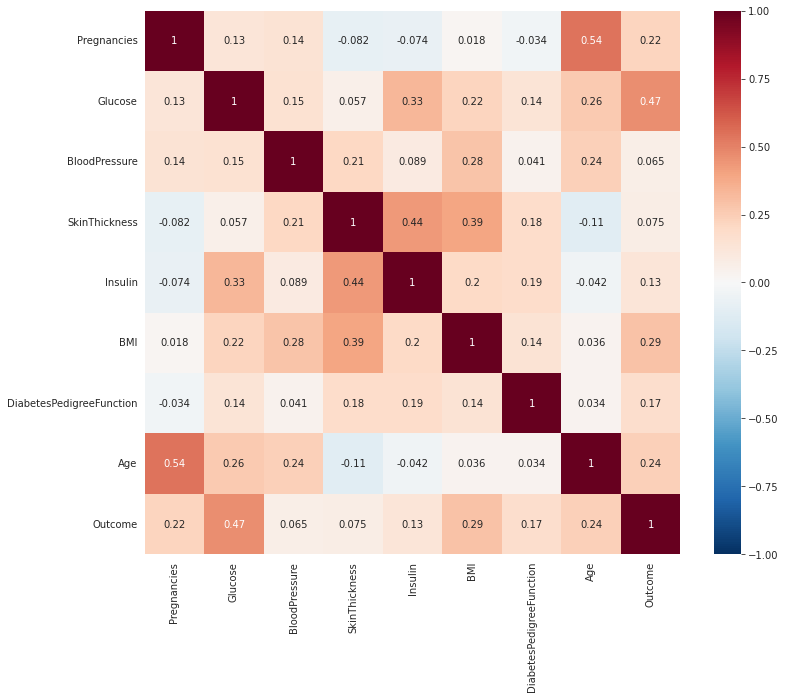

In [11]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdBu_r', annot = True, data = data)
plt.show()

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = data.drop(['Outcome'], axis = 1).copy()
Y = data['Outcome'].copy()

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, shuffle = True,random_state = 42) 

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
#Create user defined function for classification reports
def create_model(model): #here model is user defined object
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test)#test the model
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(Y_test,Y_pred))
    return model  

Ada Boosting Classification

In [17]:
#From sklearn.ensemble call AdaBoostClassifier Class
from sklearn.ensemble import AdaBoostClassifier
#Create the object of AdaBoostClassifier class and passing the no. of parameter
#in this class
ada=AdaBoostClassifier(n_estimators=100) # n_estimators can be <=100
#AdaBoost create a decision stump means understood using model DecisionTreeClassifier
#call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

Confusion Matrix
[[80 19]
 [21 34]]


Gradient Boosting Classification model

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100) #not <=100
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Confusion Matrix
[[77 22]
 [18 37]]


Extreme Gradient Boosting

In [19]:
from xgboost import XGBClassifier
#create object of class XGBClassifier
xgc=XGBClassifier(n_estimators=75,reg_alpha=1)#1 means true
#automatic overfitting: reg means regularisation and alpha or lambda or hyperparameter
#call function for classification report
xgc=create_model(xgc)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:57:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        99
           1       0.58      0.67      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154

Confusion Matrix
[[72 27]
 [18 37]]
